# Exercises

## Problem 1: Heart Attacks in Rabbits

Here, we will study whether the damage of heart attacks in rabbits can be mitigated by cooling down the heart.

In an [experiment](https://link.springer.com/content/pdf/10.1007/BF00788947), researchers induced artery occlusion in $n=32$ rabbits and studied whether the damage in the heart is mitigated by cooling the heart prior to (group 1) or shortly after (group 2) inducing the heart attack compared to a control group (group 3) without any cooling.

We’ll assume the following linear model,
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon$$
where
- $y$ (“Infarc”): size of the damaged area in grams
- $x_1$ (“Area”): size of the area at risk in grams
- $x_2$ (“X2”): 1 if rabbit is in group 1, 0 otherwise
- $x_3$ (“X3”): 1 if rabbit is in group 2, 0 otherwise

Note: $x_2$ and $x_3$ are categorical variables. Group 3 is the control group and has $x_2 = x_3 = 0$.

(a) Make a scatter plot of the size of the damaged area vs. the area at risk. Plot the $3$ different groups in different colors and make sure to include a legend.

(b) Write down the simplified equations for the expected damaged area for the 3 groups, i.e., plug in the values for $x_2$ and $x_3$ for these groups. What is the physical interpretation of $\beta_2$ and $\beta_3$?

(c) Create the design matrix of the linear equation described above.

(d) Determine the best-fit predictions using `sklearn.linear_model.LinearRegression`.

(e) Add the best-fit predictions for each of the 3 groups onto the scatter plot from exercise (a).

(f) Do the results suggest that cooling down the heart mitigates heart attack damage?

(This exercise was partially inspired by https://online.stat.psu.edu/stat462/node/134/.)

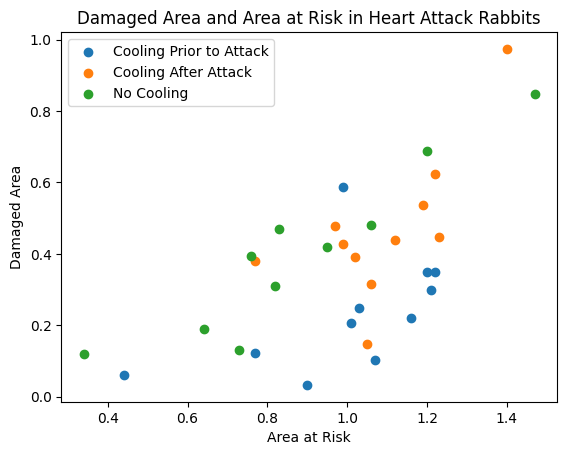

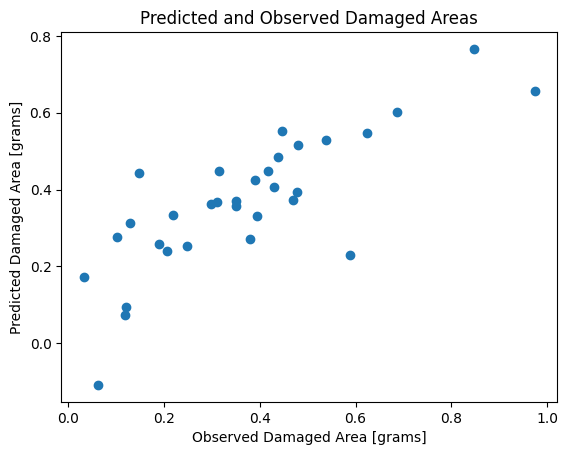

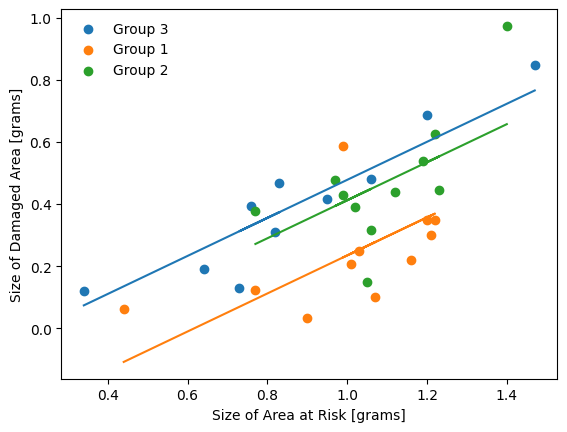

beta_0: -0.135 +/- 0.099
beta_1: 0.613 +/- 0.102
beta_2: -0.243 +/- 0.059
beta_3: -0.066 +/- 0.062
We see that only $\beta_2$ is significantly different from $0$. This indicates that we have evidence that cooling down the heart shortly after the heart attack reduces the damage.


In [15]:
# download and read the data
import urllib.request
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
urlretrieve("https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/coolhearts/index.txt", 'coolhearts.txt')
df = pd.read_csv('coolhearts.txt', sep='\t')

def scatterplot():
    group1 = df[df["Group"] == 1]
    group2 = df[df["Group"] == 2]
    group3 = df[df["Group"] == 3]

    plt.scatter(group1["Area"], group1["Infarc"], label = "Cooling Prior to Attack")
    plt.scatter(group2["Area"], group2["Infarc"], label = "Cooling After Attack")
    plt.scatter(group3["Area"], group3["Infarc"], label = "No Cooling")

    plt.title("Damaged Area and Area at Risk in Heart Attack Rabbits")
    plt.ylabel("Damaged Area")
    plt.xlabel("Area at Risk")
    plt.legend()
    plt.show()

# returns beta values, y and prints matrix
def design_matrix():
    y = df["Infarc"]
    x1 = df["Area"]
    x2 = df["X2"]
    x3 = df["X3"]

    X = np.empty((len(df), 4))
    for row in range(len(X)):
        for col in range(len(X[0])):
            # going vertically, so columns should remain the same
            match col:
                case 0:
                    X[row][col] = 1
                case 1:
                    X[row][col] = x1[row]
                case 2:
                    X[row][col] = x2[row]
                case 3:
                    X[row][col] = x3[row]
    return X, y

def test_all():
    X,y = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = reg.predict(X)

    plt.scatter(y, y_pred)
    plt.title("Predicted and Observed Damaged Areas")
    plt.xlabel('Observed Damaged Area [grams]')
    plt.ylabel('Predicted Damaged Area [grams]')
    plt.show()

def test_groups():
    X,y = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, y)

    for group in df['Group'].unique():
        use = df['Group'] == group
        plt.scatter(df['Area'][use], df['Infarc'][use], label=f'Group {group}')
        plt.plot(df['Area'][use], reg.predict(X[use]))

    plt.xlabel('Size of Area at Risk [grams]')
    plt.ylabel('Size of Damaged Area [grams]')
    plt.legend(loc='best', frameon=False)
    plt.show()

def prove_results():
    X,y = design_matrix()
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = reg.predict(X)

    sigma = np.std(y - y_pred, ddof=1)
    beta = reg.coef_
    beta_var = sigma**2 * np.linalg.inv(X.T @ X)

    for i in range(len(beta)):
        print(f'beta_{i}: {beta[i]:.3f} +/- {np.sqrt(beta_var[i, i]):.3f}')


scatterplot()
test_all()
test_groups()
prove_results()



We see that only $\beta_2$ is significantly different from $0$. This indicates that we have evidence that cooling down the heart shortly after the heart attack reduces the damage.

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon$$

Group 1: $x_2 = 1$, $x_3 = 0$ --> $y = \beta_0 + \beta_1 x_1 + x_2 + \varepsilon$

Group 2: $x_3 = 1$, $x_2 = 0$ --> $y = \beta_0 + \beta_1 x_1 + x_3 + \varepsilon$

Group 3: $x_2 = 0$, $x_3 = 0$ --> $y = \beta_0 + \beta_1 x_1 + \varepsilon$

$\beta_2$ and $\beta_3$ correspond to changes in the damaged area due to cooling.